<a href="https://colab.research.google.com/github/IlyaZutler/Project-OpenWeather/blob/main/beginings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import datetime
import base64
import requests, json
import matplotlib.pyplot as plt
#import numpy as np
import datetime

In [113]:
print('''A weather forecaster is like a sapper,
he makes mistakes only once,
but every day''')

A weather forecaster is like a sapper,
he makes mistakes only once,
but every day


In [114]:
def local_time():

    now_time = datetime.datetime.now()
    print("Current date and time : ")
    print(now_time.strftime("%Y-%m-%d %H:%M:%S"))

local_time()

Current date and time : 
2024-06-04 15:01:19


In [115]:
#replace key to 64b
import base64

# key = 'e7df4a8e075be92ad1b7835b674e5540'
# key_bytes = key.encode('utf-8')
# key_hide = base64.b64encode(key_bytes, altchars=None)
# print(key_hide)
open_key = b'ZTdkZjRhOGUwNzViZTkyYWQxYjc4MzViNjc0ZTU1NDA='
key_2 = base64.b64decode(open_key, altchars=None, validate=False)

print(key_2.decode('utf-8'))



e7df4a8e075be92ad1b7835b674e5540


In [116]:
import requests, json

#city = input('city: ')

city = 'London'

def get_data(city, open_key):
    api_url = "http://api.openweathermap.org/data/2.5/forecast"
    units = "metric"
    appid = base64.b64decode(open_key, altchars=None, validate=False)

    response = requests.get(api_url, params={"q": city, "units": units, "appid": appid})
    data = response.json()
    return data

data = get_data(city, open_key)


In [117]:
print(data['cod'])
if data['cod'] == '404':
    print('city not found')

200


In [118]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1717524000,
   'main': {'temp': 17.49,
    'feels_like': 17.12,
    'temp_min': 15.8,
    'temp_max': 17.49,
    'pressure': 1008,
    'sea_level': 1008,
    'grnd_level': 1004,
    'humidity': 70,
    'temp_kf': 1.69},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03d'}],
   'clouds': {'all': 47},
   'wind': {'speed': 5.34, 'deg': 264, 'gust': 9.34},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2024-06-04 18:00:00'},
  {'dt': 1717534800,
   'main': {'temp': 14.57,
    'feels_like': 14.17,
    'temp_min': 12.69,
    'temp_max': 14.57,
    'pressure': 1010,
    'sea_level': 1010,
    'grnd_level': 1006,
    'humidity': 80,
    'temp_kf': 1.88},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10n'}],
   'clouds': {'all': 73},
   'wind': {'speed': 4.5, 'deg': 329, 'gust': 8.9},
   'visibility': 10

In [119]:
city_timezone = data['city']['timezone']
city_timezone

3600

In [120]:
data['list'][0]

{'dt': 1717524000,
 'main': {'temp': 17.49,
  'feels_like': 17.12,
  'temp_min': 15.8,
  'temp_max': 17.49,
  'pressure': 1008,
  'sea_level': 1008,
  'grnd_level': 1004,
  'humidity': 70,
  'temp_kf': 1.69},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'clouds': {'all': 47},
 'wind': {'speed': 5.34, 'deg': 264, 'gust': 9.34},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'd'},
 'dt_txt': '2024-06-04 18:00:00'}

In [121]:
def data_to_lists(data):
    dt_txt = []
    temp = []
    temp_min = []
    temp_max = []
    humidity = []
    description = []
    for i in range(len(data['list'])):
        dt_txt.append(data['list'][i]['dt_txt'])
        temp.append(data['list'][i]['main']['temp'])
        temp_min.append(data['list'][i]['main']['temp_min'])
        temp_max.append(data['list'][i]['main']['temp_max'])
        humidity.append(data['list'][i]['main']['humidity'])
        description.append(data['list'][i]['weather'][0]['description'])
    return dt_txt, temp, temp_min, temp_max, humidity, description
dt_txt, temp, temp_min, temp_max, humidity, description = data_to_lists(data)
print(humidity)



[70, 80, 79, 72, 65, 43, 37, 40, 50, 64, 67, 75, 68, 57, 39, 39, 45, 60, 77, 71, 67, 49, 57, 67, 73, 75, 83, 91, 74, 51, 43, 49, 44, 64, 76, 76, 71, 53, 39, 44]


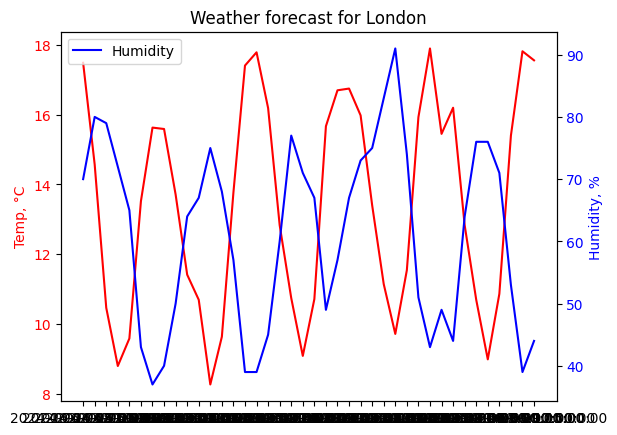

In [122]:
fig, ax1 = plt.subplots()

ax1.plot(dt_txt, temp, color="red", label="Temp")
ax1.set_ylabel("Temp, °C", color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()
ax2.plot(dt_txt, humidity, color="blue", label="Humidity")
ax2.set_ylabel("Humidity, %", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

plt.xlabel("Date")
plt.title("Weather forecast for " + city)
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()


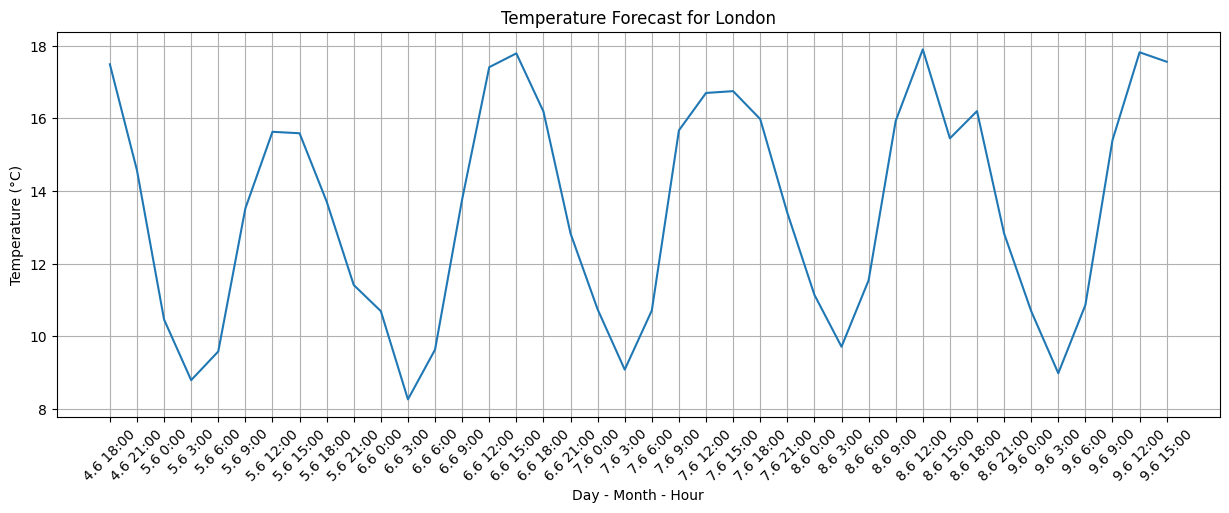

In [123]:
import matplotlib.pyplot as plt
#import numpy as np
import datetime

# Convert dt_txt to datetime objects
dt_txt_datetime = []
for date_str in dt_txt:
    dt_txt_datetime.append(datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S'))

# Extract month, day, and hour from datetime objects
month_day_hour = []
for date in dt_txt_datetime:
    month_day_hour.append(f'{date.day}.{date.month} {date.hour}:00')

# Plot temperature vs. month-day-hour
plt.figure(figsize=(15, 5))
plt.plot(month_day_hour, temp)
plt.xlabel('Day - Month - Hour')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature Forecast for {city}')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [124]:
city_timezone = data['city']['timezone']
city_timezone

def time_in_the_city(city_timezone):
    # Get the current time in UTC
    utc_now = datetime.datetime.utcnow()

    # Create a timezone object with an offset of 'city_timezone' seconds
    timezone = datetime.timezone(datetime.timedelta(seconds=city_timezone))

    # Convert the UTC time to the specified timezone
    local_time = utc_now.astimezone(timezone)

    # Print the local time
    return local_time

local_time =  time_in_the_city(city_timezone)


In [133]:

print(f'Time in the {city}:'.ljust(19),  f'{local_time.strftime("%H:%M:%S  %d.%m.%Y")}')
print(f'Temperature:'.ljust(19),  f'from {temp_min[0]:.1f}  to {temp_max[0]:.1f} °C')
print('Weather:'.ljust(19),  f'{description[0]}')
print('Humidity:'.ljust(19),  f'{humidity[0]} %')


Time in the London: 16:01:22  04.06.2024
Temperature:        from 15.8  to 17.5 °C
Weather:            scattered clouds
Humidity:           70 %
